In [ ]:

# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['month_name']=df['job_posted_date'].dt.month_name()




In [ ]:
jobs=df['job_title_short'].unique()
df= df[df['job_skills'].notna()]
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x))          #Exploded the skills list
df_exp= df.explode('job_skills').copy()


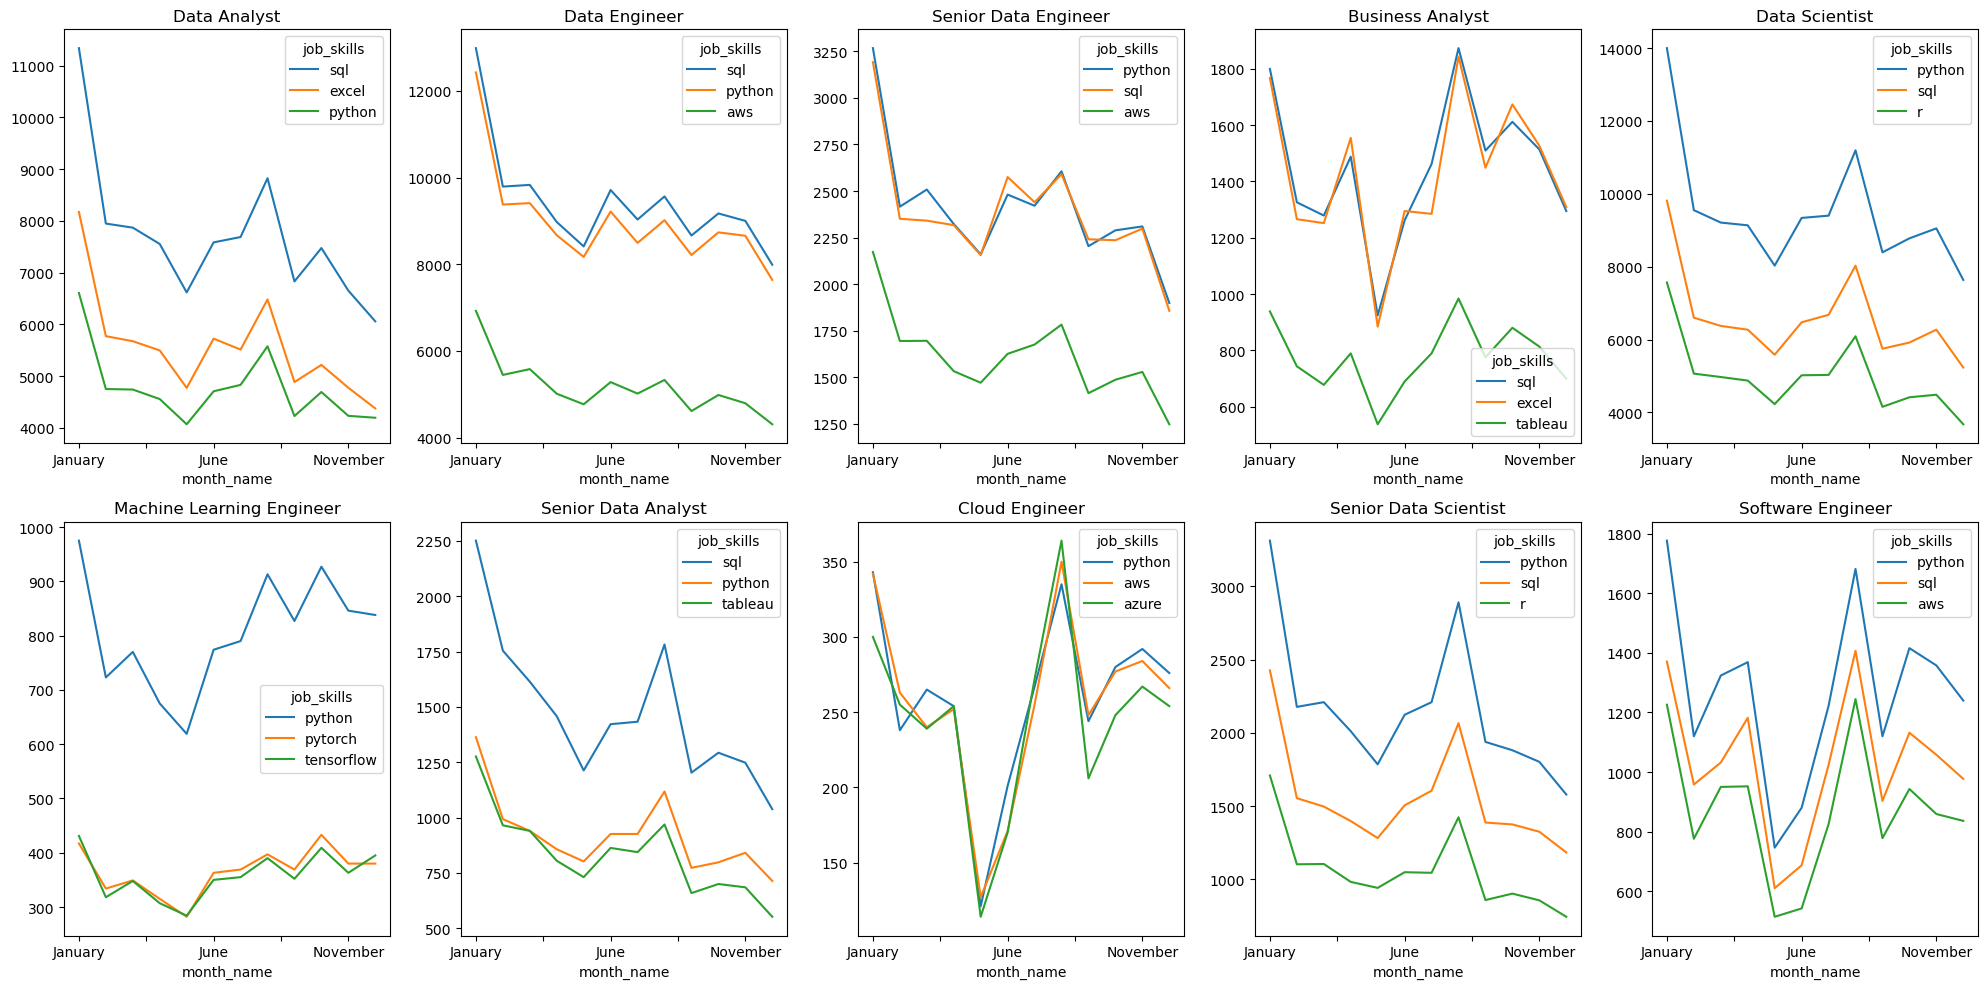

In [ ]:
fig , ax = plt.subplots(2,5, figsize=(20,10))
jobs= df_exp['job_title_short'].unique()
count=0
ax=ax.flatten()
for job in jobs:
    df_da=df_exp[df_exp['job_title_short']== job]
    top_skills= df_da['job_skills'].value_counts(ascending=False).head(3).index
    df_da_pt= df_da.pivot_table(index='month_name',columns='job_skills',aggfunc='size',fill_value=0).reindex(['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'])
    df_da_pt.loc[:,top_skills].plot(kind='line',ax=ax[count],title=job)
    count+=1
fig.tight_layout()